<a href="https://colab.research.google.com/github/swapnamoy007/ML-ASSIGNMENT/blob/main/Module_9/Final_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Packages

Note that installing both Mendeleev and Materials Project is a bit tricky. Please follow the instructions in the markdown fields.

In [1]:
!pip install mp_api
!pip install -U mendeleev

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.4 MB/s eta 0:00:00
   ━━━━━

*** Do not restart the runtime here***

# Mendeleev

This is the link to original Mendeleev package: https://github.com/lmmentel/mendeleev/


**Now restart the runtime and run the code below**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mendeleev
import sqlalchemy

from mendeleev.fetch import fetch_table

In [3]:
from mendeleev import Si, Fe, O
print("Si's name: ", Si.name)
print("Fe's atomic number:", Fe.atomic_number)
print("O's atomic weight: ", O.atomic_weight)

Si's name:  Silicon
Fe's atomic number: 26
O's atomic weight:  15.999


In [4]:
# what modules are in mendeleev
# dir(mendeleev)

In [5]:
# mendeleev.models.IonicRadius

In [6]:
ptable = fetch_table('elements')
ptable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   annotation                     118 non-null    object 
 1   atomic_number                  118 non-null    int64  
 2   atomic_radius                  90 non-null     float64
 3   atomic_volume                  91 non-null     float64
 4   block                          118 non-null    object 
 5   density                        118 non-null    float64
 6   description                    109 non-null    object 
 7   dipole_polarizability          117 non-null    float64
 8   electron_affinity              77 non-null     float64
 9   electronic_configuration       118 non-null    object 
 10  evaporation_heat               88 non-null     float64
 11  fusion_heat                    75 non-null     float64
 12  group_id                       90 non-null     flo

In [7]:
cols = ['atomic_number', 'symbol', 'atomic_radius', 'en_pauling', 'block', 'vdw_radius_mm3']
ptable[cols].head()

,atomic_number,symbol,atomic_radius,en_pauling,block,vdw_radius_mm3
0,1,H,25.0,2.20,s,162.0
1,2,He,120.0,NaN,s,153.0
2,3,Li,145.0,0.98,s,255.0
3,4,Be,105.0,1.57,s,223.0
4,5,B,85.0,2.04,p,215.0


In [8]:
df_elements = ptable[cols]
df_elements.head()

,atomic_number,symbol,atomic_radius,en_pauling,block,vdw_radius_mm3
0,1,H,25.0,2.20,s,162.0
1,2,He,120.0,NaN,s,153.0
2,3,Li,145.0,0.98,s,255.0
3,4,Be,105.0,1.57,s,223.0
4,5,B,85.0,2.04,p,215.0


Now we have access to the properties of elements

# Materials Project API

This part of the notebook shows how to curate data from Materials Project along with an example to send a query.

- Notebook prepared by Ayana Ghosh

- Email: research.aghosh@gmail.com

Import libraries

In [9]:
#using new version of Materials Project API
from mp_api.client import MPRester
import pandas as pd

Check which properties are available

- https://github.com/materialsproject/mapidoc/tree/master/materials
- https://next-gen.materialsproject.org/api

In [10]:
MPRestermpr = MPRester("Fyy195X4eENbE9KHTlkZK0lzVSREjq7v")
MPRestermpr.materials.available_fields

['builder_meta',
 'nsites',
 'elements',
 'nelements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'volume',
 'density',
 'density_atomic',
 'symmetry',
 'material_id',
 'structure',
 'deprecated',
 'deprecation_reasons',
 'initial_structures',
 'task_ids',
 'deprecated_tasks',
 'calc_types',
 'last_updated',
 'created_at',
 'origins',
 'warnings',
 'task_types',
 'run_types',
 'entries']

Example query that gives material systems with following criteria:
insulating, stable, direct band gap and combines it into a dataframe

In [11]:
docs = MPRestermpr.materials.summary.search(is_metal=False,is_stable=True,
                          all_fields=False,is_gap_direct=True,theoretical=False,
                          fields=["material_id","structure","e_total", 'initial_structures',
                                  "symmetry","formula_pretty","formation_energy_per_atom","energy_above_hull"])

Retrieving SummaryDoc documents:   0%|          | 0/3682 [00:00<?, ?it/s]

In [12]:
# Experiment with what is contained in these fields
# docs[2]

In [13]:
df = pd.DataFrame()
df["mpids"] = [doc.material_id for doc in docs]
df["struc"] = [doc.structure for doc in docs]
df["crystal_system"]    = [doc.symmetry.crystal_system for doc in docs]
df["e_total"]                       = [doc.e_total for doc in docs]
df["pretty_formula"]                = [doc.formula_pretty for doc in docs]
df["formation_energy_per_atom"]     = [doc.formation_energy_per_atom for doc in docs]
df["energy_above_hull"]             = [doc.energy_above_hull for doc in docs]

In [14]:
df.head()

,mpids,struc,crystal_system,e_total,pretty_formula,formation_energy_per_atom,energy_above_hull
0,mp-30274,"[[3.23277773 3.23277773 6.29799073] Ac, [1.077...",Tetragonal,NaN,AcBrO,-3.362475,0.0
1,mp-18125,"[[5.48781898 4.9540164 2.67787168] Ag, [ 0. ...",Monoclinic,NaN,Ag(AuF4)2,-1.203594,0.0
2,mp-567334,"[[7.87262662 7.87262662 7.87262662] Ag, [ 7.87...",Cubic,NaN,Ag(BCl)6,-0.736951,0.0
3,mp-1195193,"[[ 0.1486133 25.49510107 0.1398944 ] Ag, [ 0...",Monoclinic,NaN,Ag12Sn7H16(Se11N2)2,-0.480199,0.0
4,mp-23558,"[[5.88286112 4.72844634 2.42596894] Ag, [4.524...",Orthorhombic,26.531189,Ag2BiO3,-0.923417,0.0


Now, let's import a different object.

In [15]:
docs2 = MPRestermpr.materials.summary.search(is_metal=False,is_stable=True,
                          all_fields=False,is_gap_direct=False,theoretical=False,
                          fields=["material_id","elements","nelements", "symmetry",
                                  "composition","volume", "density","formula_anonymous","formation_energy_per_atom","energy_above_hull"])

Retrieving SummaryDoc documents:   0%|          | 0/8677 [00:00<?, ?it/s]

In [16]:
df2 = pd.DataFrame()
df2["mpids"] = [doc.material_id for doc in docs2]
df2["elements"] = [doc.elements for doc in docs2]
df2["nelements"] = [doc.nelements for doc in docs2]
df2["composition"]  = [doc.composition for doc in docs2]
df2["volume"] = [doc.volume for doc in docs2]
df2["density"] = [doc.density for doc in docs2]
df2["crystal_system"]    = [doc.symmetry.crystal_system for doc in docs2]
df2["energy_above_hull"] = [doc.energy_above_hull for doc in docs2]
df2["formula_anonymous"] = [doc.formula_anonymous for doc in docs2]
df2["formation_energy_per_atom"] = [doc.formation_energy_per_atom for doc in docs2]
df2["energy_above_hull"] = [doc.energy_above_hull for doc in docs2]

In [17]:
df2.tail()

,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom
8672,mp-23270,"[Bi, Th]",2,"(Th, Bi)",452.264106,11.250087,Cubic,0.0,A3B4,-0.650620
8673,mp-467,"[N, Th]",2,"(Th, N)",119.061270,10.490057,Trigonal,0.0,A3B4,-1.884495
8674,mp-1347,"[P, Th]",2,"(Th, P)",326.141846,8.350093,Cubic,0.0,A3B4,-1.613488
8675,mp-552,"[Sb, Th]",2,"(Th, Sb)",423.736420,9.273094,Cubic,0.0,A3B4,-1.103433
8676,mp-1194755,"[F, Th, Tl]",3,"(Th, Tl, F)",526.793498,7.234068,Orthorhombic,0.0,AB3C13,-4.171677


# Exploring Element Space

Now, let's select only the binary compounds from the dataframe df2

In [18]:
df_AB = df2[df2['formula_anonymous'].isin(['AB'])]
df_AB.head()

,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom
53,mp-23231,"[Ag, Br]",2,"(Ag, Br)",48.383938,6.444351,Cubic,0.0,AB,-0.504400
54,mp-22922,"[Ag, Cl]",2,"(Ag, Cl)",42.630581,5.582623,Cubic,0.0,AB,-0.568440
110,mp-2172,"[Al, As]",2,"(Al, As)",45.711095,3.701818,Cubic,0.0,AB,-0.627043
137,mp-1550,"[Al, P]",2,"(Al, P)",40.983458,2.348192,Cubic,0.0,AB,-0.737249
144,mp-2624,"[Al, Sb]",2,"(Al, Sb)",59.151809,4.175547,Cubic,0.0,AB,-0.252975


The actual entries in the table are fairly complex objects in the Materials Project format. Rather then digging deep into it, we will simply convert it into string object and create two columns that contain the element symbols.

In [19]:
df_AB.loc[:, 'Ell_Val'] = df_AB['elements'].astype(str)

# Remove "Element" and split into two columns 'x' and 'y'
df_AB['Ell_Val'] = df_AB['Ell_Val'].str.replace('Element', '')
df_AB[['x', 'y']] = df_AB['Ell_Val'].str.strip('[]').str.split(', ', expand=True)

# Convert the 'x' and 'y' columns to strings if needed
df_AB['x'] = df_AB['x'].astype(str)
df_AB['y'] = df_AB['y'].astype(str)

df_AB.head()

<ipython-input-19-f77b3c512794>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB.loc[:, 'Ell_Val'] = df_AB['elements'].astype(str)
<ipython-input-19-f77b3c512794>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['Ell_Val'] = df_AB['Ell_Val'].str.replace('Element', '')
<ipython-input-19-f77b3c512794>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom,Ell_Val,x,y
53,mp-23231,"[Ag, Br]",2,"(Ag, Br)",48.383938,6.444351,Cubic,0.0,AB,-0.504400,"[ Ag, Br]",Ag,Br
54,mp-22922,"[Ag, Cl]",2,"(Ag, Cl)",42.630581,5.582623,Cubic,0.0,AB,-0.568440,"[ Ag, Cl]",Ag,Cl
110,mp-2172,"[Al, As]",2,"(Al, As)",45.711095,3.701818,Cubic,0.0,AB,-0.627043,"[ Al, As]",Al,As
137,mp-1550,"[Al, P]",2,"(Al, P)",40.983458,2.348192,Cubic,0.0,AB,-0.737249,"[ Al, P]",Al,P
144,mp-2624,"[Al, Sb]",2,"(Al, Sb)",59.151809,4.175547,Cubic,0.0,AB,-0.252975,"[ Al, Sb]",Al,Sb


Now, let's create an additional column and set the values there as Pauling electronegativity for the element in column 'x'

In [20]:
df_AB['El1_pauling'] = None

for index, row in df_AB.iterrows():
    z = row['x'].strip()
    matching_row = df_elements[df_elements['symbol'] == z]
    if not matching_row.empty:
        electro_value = matching_row['en_pauling'].values[0]
        df_AB.at[index, 'El1_pauling'] = electro_value

<ipython-input-20-a972239474c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['El1_pauling'] = None


And do the same for the element in column 'y'

In [21]:
df_AB['El2_pauling'] = None

for index, row in df_AB.iterrows():
    z = row['y'].strip()
    matching_row = df_elements[df_elements['symbol'] == z]

    if not matching_row.empty:
        electro_value = matching_row['en_pauling'].values[0]
        df_AB.at[index, 'El2_pauling'] = electro_value

df_AB.head()

<ipython-input-21-37ff43e2a9d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['El2_pauling'] = None


,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom,Ell_Val,x,y,El1_pauling,El2_pauling
53,mp-23231,"[Ag, Br]",2,"(Ag, Br)",48.383938,6.444351,Cubic,0.0,AB,-0.504400,"[ Ag, Br]",Ag,Br,1.93,2.96
54,mp-22922,"[Ag, Cl]",2,"(Ag, Cl)",42.630581,5.582623,Cubic,0.0,AB,-0.568440,"[ Ag, Cl]",Ag,Cl,1.93,3.16
110,mp-2172,"[Al, As]",2,"(Al, As)",45.711095,3.701818,Cubic,0.0,AB,-0.627043,"[ Al, As]",Al,As,1.61,2.18
137,mp-1550,"[Al, P]",2,"(Al, P)",40.983458,2.348192,Cubic,0.0,AB,-0.737249,"[ Al, P]",Al,P,1.61,2.19
144,mp-2624,"[Al, Sb]",2,"(Al, Sb)",59.151809,4.175547,Cubic,0.0,AB,-0.252975,"[ Al, Sb]",Al,Sb,1.61,2.05


Finally, let's create column crystal_system2 that will contain the data on the crystal system.

In [22]:
'''
df_AB['crystal_system2'] = df_AB['crystal_system'].str.extract(r"'(.*?)'")
df_AB.head()
'''

'\ndf_AB[\'crystal_system2\'] = df_AB[\'crystal_system\'].str.extract(r"\'(.*?)\'")\ndf_AB.head()\n'

In [23]:
df_AB['crystal_system2'] = None

# Iterate through each row and apply str() to 'crystal_system' column
for index, row in df_AB.iterrows():
    elt = str(row['crystal_system'])
    df_AB.at[index, 'crystal_system2'] = elt

df_AB.head()

<ipython-input-23-9563d4eec0dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['crystal_system2'] = None


,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom,Ell_Val,x,y,El1_pauling,El2_pauling,crystal_system2
53,mp-23231,"[Ag, Br]",2,"(Ag, Br)",48.383938,6.444351,Cubic,0.0,AB,-0.504400,"[ Ag, Br]",Ag,Br,1.93,2.96,Cubic
54,mp-22922,"[Ag, Cl]",2,"(Ag, Cl)",42.630581,5.582623,Cubic,0.0,AB,-0.568440,"[ Ag, Cl]",Ag,Cl,1.93,3.16,Cubic
110,mp-2172,"[Al, As]",2,"(Al, As)",45.711095,3.701818,Cubic,0.0,AB,-0.627043,"[ Al, As]",Al,As,1.61,2.18,Cubic
137,mp-1550,"[Al, P]",2,"(Al, P)",40.983458,2.348192,Cubic,0.0,AB,-0.737249,"[ Al, P]",Al,P,1.61,2.19,Cubic
144,mp-2624,"[Al, Sb]",2,"(Al, Sb)",59.151809,4.175547,Cubic,0.0,AB,-0.252975,"[ Al, Sb]",Al,Sb,1.61,2.05,Cubic


Now, let's see what crystal systems are there

In [24]:
df_AB['crystal_system2'].values

array(['Cubic', 'Cubic', 'Cubic', 'Cubic', 'Cubic', 'Monoclinic',
       'Monoclinic', 'Monoclinic', 'Cubic', 'Cubic', 'Cubic', 'Cubic',
       'Cubic', 'Cubic', 'Cubic', 'Orthorhombic', 'Cubic', 'Hexagonal',
       'Cubic', 'Cubic', 'Cubic', 'Orthorhombic', 'Orthorhombic', 'Cubic',
       'Cubic', 'Cubic', 'Cubic', 'Orthorhombic', 'Orthorhombic', 'Cubic',
       'Orthorhombic', 'Cubic', 'Cubic', 'Cubic', 'Cubic', 'Hexagonal',
       'Hexagonal', 'Monoclinic', 'Monoclinic', 'Orthorhombic',
       'Trigonal', 'Orthorhombic', 'Tetragonal', 'Tetragonal',
       'Tetragonal', 'Tetragonal', 'Orthorhombic', 'Trigonal', 'Cubic',
       'Monoclinic', 'Orthorhombic', 'Cubic', 'Orthorhombic',
       'Orthorhombic', 'Monoclinic', 'Cubic', 'Tetragonal', 'Hexagonal',
       'Monoclinic', 'Hexagonal', 'Cubic', 'Tetragonal', 'Orthorhombic',
       'Hexagonal', 'Monoclinic', 'Cubic', 'Cubic', 'Monoclinic', 'Cubic',
       'Cubic', 'Hexagonal', 'Monoclinic', 'Cubic', 'Orthorhombic',
       'Monoclinic'

And plot the crystal system as a function of Pauling electronegativities of individual elements.

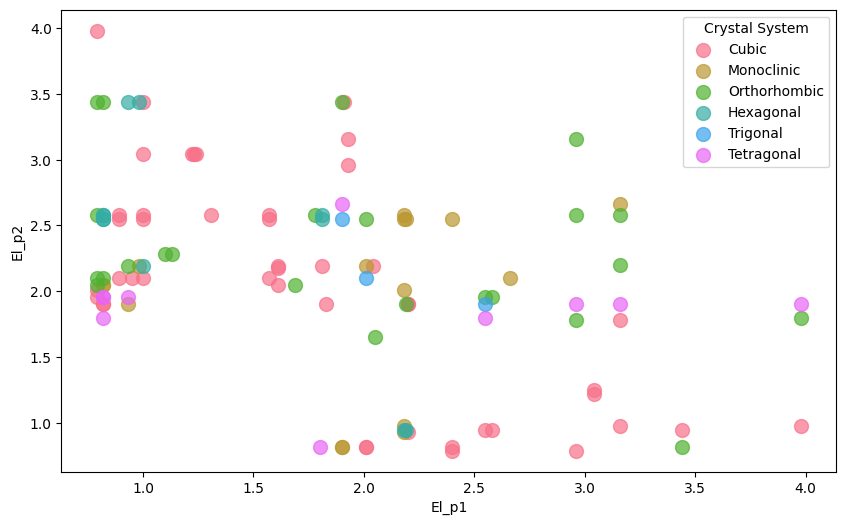

In [25]:
import seaborn as sns

unique_entries = df_AB['crystal_system2'].unique()

plt.figure(figsize=(10, 6))
palette = sns.color_palette('husl', len(unique_entries))

# Create a scatterplot with different symbols for each unique entry
for i, entry in enumerate(unique_entries):
    subset = df_AB[df_AB['crystal_system2'] == entry]
    plt.scatter(subset['El1_pauling'], subset['El2_pauling'], label=entry, marker='o', s=100, alpha=0.7, color=palette[i])

# Add labels and legend
plt.xlabel('El_p1')
plt.ylabel('El_p2')
plt.legend(title='Crystal System')

# Show the plot
plt.show()

# Final Exam - I

In this part of exam, we will try to understand what properties of elements control the symmetry of the crystal structure of binary compounds.

I.1. Build the descriptor vector for each element based on the Mendeleev imports. For example, you can pick several elements from the list of (atomic_number, atomic_radius, dipole_polarizability,        electron_affinity, vdw_radius, covalent_radius_cordero, covalent_radius_pyykko, en_pauling, en_allen, covalent_radius_bragg, dipole_polarizability_unc, pettifor_number, glawe_number). Choose 4 - 8 descriptors and create dataframe for these descriptors for each element.

Descriptor DataFrame:
    atomic_number  atomic_radius  dipole_polarizability  electron_affinity  \
0              1           25.0                4.50711           0.754195   
1              2          120.0                1.38375         -19.700000   
2              3          145.0              164.11250           0.618049   
3              4          105.0               37.74000          -2.400000   
4              5           85.0               20.50000           0.279723   

   vdw_radius  covalent_radius_cordero  en_pauling  pettifor_number symbol  
0       110.0                     31.0        2.20            103.0      H  
1       140.0                     28.0       -1.00              1.0     He  
2       182.0                    128.0        0.98             12.0     Li  
3       153.0                     96.0        1.57             77.0     Be  
4       192.0                     84.0        2.04             86.0      B  

Correlation Matrix:
                          atomi

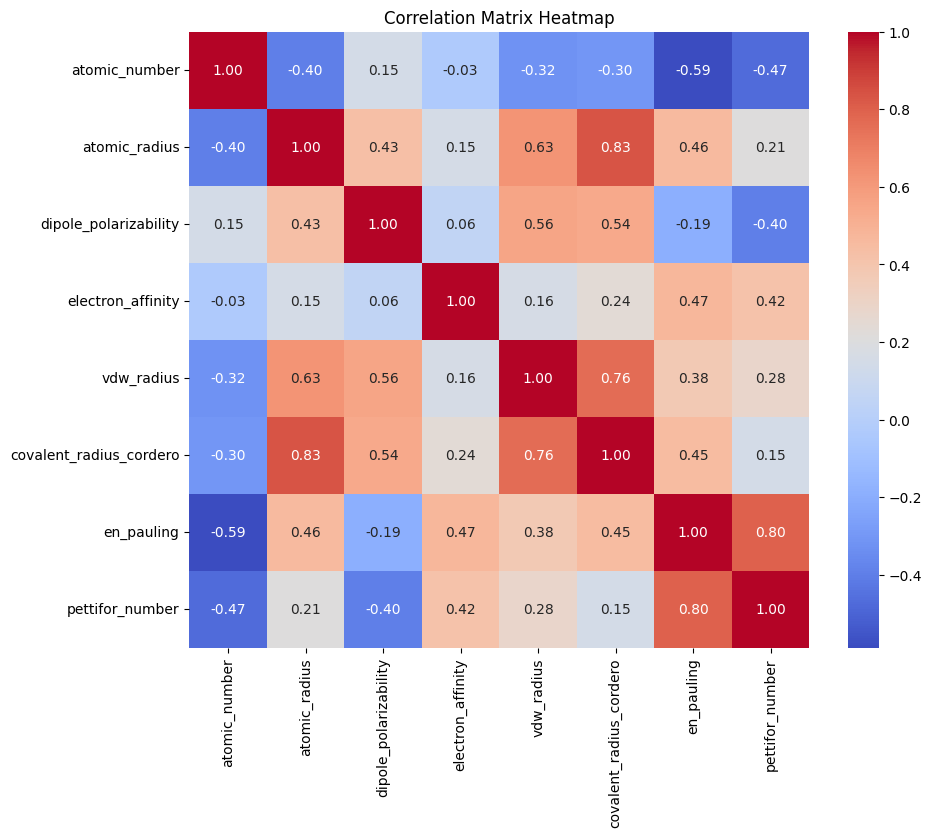

In [26]:
# Import necessary libraries
from mendeleev.fetch import fetch_table
from mendeleev import element
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Choose descriptors
descriptors = [
    "atomic_number",
    "atomic_radius",
    "dipole_polarizability",
    "electron_affinity",
    "vdw_radius",
    "covalent_radius_cordero",
    "en_pauling",
    "pettifor_number"
]

# Step 2: Fetch the periodic table
ptable = fetch_table("elements")  # Retrieve elements as a DataFrame

# Step 3: Build the descriptor DataFrame
data = []
for symbol in ptable["symbol"]:
    try:
        el = element(symbol)  # Retrieve element object by its symbol
        descriptor_values = {desc: getattr(el, desc, None) for desc in descriptors}  # Get descriptor values
        descriptor_values["symbol"] = symbol  # Add element symbol
        data.append(descriptor_values)
    except Exception as e:
        print(f"Error processing element {symbol}: {e}")

# Convert the data to a DataFrame
df_descriptors = pd.DataFrame(data)

# Step 4: Handle missing values
df_descriptors.fillna(value={"atomic_radius": -1, "dipole_polarizability": -1,
                              "electron_affinity": -1, "vdw_radius": -1,
                              "covalent_radius_cordero": -1, "en_pauling": -1,
                              "pettifor_number": -1}, inplace=True)

# Step 5: Save and display the descriptor DataFrame
df_descriptors.to_csv("element_descriptors_advanced.csv", index=False)

print("Descriptor DataFrame:\n", df_descriptors.head())

# Step 7: Analyze correlations between numerical descriptors
correlation_matrix = df_descriptors.drop(columns="symbol").corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# (Optional) Filter for specific elements of interest
elements_in_use = ["Si", "O", "C", "N", "Al", "Fe", "Mg"]  # Example subset
df_filtered = df_descriptors[df_descriptors["symbol"].isin(elements_in_use)]
print("\nFiltered Descriptor DataFrame:\n", df_filtered)

# Save the filtered dataset and correlation matrix
df_filtered.to_csv("filtered_element_descriptors.csv", index=False)
correlation_matrix.to_csv("correlation_matrix_advanced.csv")

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


I.2. Explain the choice of descriptors from the point of view of materials science. Why do you think the properties you selected should matter (feel free to discuss with ChatGPT)

Answer-
From the perspective of influence on an element's physical, chemical, and electronic properties, these factors have their crucial roles:

**Atomic Number**: Fundamental identifier affecting electronic configuration and periodic trends.
**Atomic Radius**: Determines lattice structures, packing, and bonding.
**Dipole Polarizability**: Key for dielectric behavior and intermolecular forces; measures the ease with which the electron cloud of an atom can be distorted by an electric field.
**Electron Affinity**: Governs redox behavior and dopant properties in semiconductors.
**van der Waals Radius**: Important for cohesion, adsorption, and catalytic interactions.
**Covalent Radius**: Influences bond lengths, strength, and material rigidity.
**Electronegativity (Pauling)**: Predicts bond type and reactivity.
**Pettifor Number**: Synthetic property that encapsulates trends across Captures periodic trends, aiding in phase stability and alloy design.




I.3. Explain the choice of descriptors from the point of view of data science. E.g.:
- Is there benefit in taking more simialr descriptors (e.g. different versions of the VdW radius), or not?
- What about augmenting the descriptor vector by symbol of the element? Can it improve prediction?

Answer:
From a data science perspective, descriptor selection balances informativeness and redundancy to maximize predictive power and model interpretability:

**Redundancy vs. Diversity**: Including multiple similar descriptors (e.g., different versions of van der Waals radius) may not add significant value, as they are often highly correlated. Instead, they can introduce noise, overfit the model, or inflate computational costs. Feature selection techniques like PCA or mutual information can identify and reduce redundant features.

**Symbol of the Element**: Adding the symbol of the element as a categorical feature can improve prediction for models that leverage symbolic information (e.g., tree-based or embeddings in deep learning). However, this approach might add complexity and is generally less effective for numerical models unless the symbol represents meaningful, structured groupings (e.g., periods or groups in the periodic table).

**Descriptor Diversity**: Including diverse descriptors like electronic, geometric, and periodic trends ensures the model captures a broad range of influences on material properties. This variety improves model generalizability across different material systems.

**Trade-offs in Augmentation**: Over-augmentation of the descriptor vector with similar or irrelevant features can lead to overfitting and reduced interpretability. Conversely, careful augmentation (e.g., categorical or one-hot encoded features for chemical groups) can enhance the model's ability to generalize patterns.

I.4. Chose the unsupervised linear analysis method and explore the factors that control the crystal structure in the corresponding reduced dimensinality space. Note that you need to come up with some startegy for combining the information from both elements. For example:
- You can choose PCA and use the PCA1 component from first vector and PCA1 component from second vector
- Or you can concatenate the descriptors and analyze the combined descriptors.

<ipython-input-27-046304ef8be1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['elements'] = df_AB['elements'].astype(str)
<ipython-input-27-046304ef8be1>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB[['x', 'y']] = (
<ipython-input-27-046304ef8be1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

First few rows of 'x' and 'y' columns:
      x   y
53   Ag  Br
54   Ag  Cl
110  Al  As
137  Al   P
144  Al  Sb
First few rows with descriptors:
     atomic_number_x  atomic_number_y  atomic_radius_x  atomic_radius_y  \
53                47               35            160.0            115.0   
54                47               17            160.0            100.0   
110               13               33            125.0            115.0   
137               13               15            125.0            100.0   
144               13               51            125.0            145.0   

     dipole_polarizability_x  dipole_polarizability_y  electron_affinity_x  \
53                      55.0                     21.0              1.30200   
54                      55.0                     14.6              1.30200   
110                     57.8                     30.0              0.43283   
137                     57.8                     25.0              0.43283   
144            

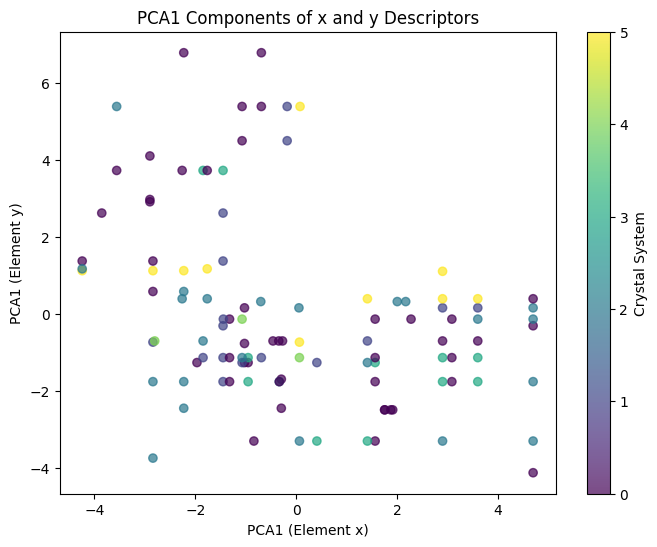

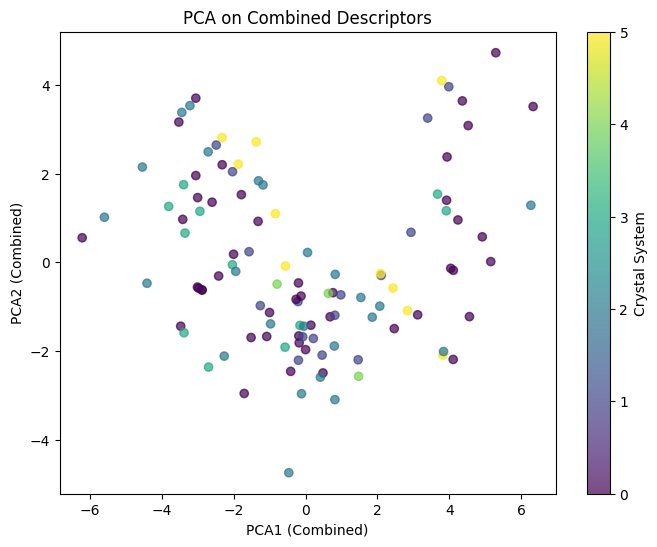

Explained Variance for x PCA1: [0.71764162]
Explained Variance for y PCA1: [0.70519369]
Explained Variance for Combined PCA: [0.48740121 0.2320702 ]


In [27]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Example: Ensure df_AB exists (replace this with your actual DataFrame)
# df_AB = pd.read_csv('your_file.csv')  # Uncomment to load your data

# Step 1: Ensure the 'elements' column is valid
if 'elements' not in df_AB.columns:
    raise ValueError("'elements' column is missing in df_AB.")

# Check for null values and handle them
if df_AB['elements'].isnull().any():
    print("Warning: Null values found in 'elements' column. Filling with placeholders.")
    df_AB['elements'] = df_AB['elements'].fillna("[Element_X, Element_Y]")  # Placeholder for missing values

# Ensure 'elements' column is string before applying string operations
df_AB['elements'] = df_AB['elements'].astype(str)

# Split 'elements' into 'x' and 'y' columns
df_AB[['x', 'y']] = (
    df_AB['elements']
    .str.strip("[]")  # Remove square brackets
    .str.split(", ", expand=True)  # Split into two columns
)

# Remove any 'Element' prefix or extra spaces if present
df_AB['x'] = df_AB['x'].str.replace("Element", "").str.strip()
df_AB['y'] = df_AB['y'].str.replace("Element", "").str.strip()

print("First few rows of 'x' and 'y' columns:")
print(df_AB[['x', 'y']].head())

# Step 2: Map descriptors for x and y elements
if df_descriptors.empty:
    raise ValueError("df_descriptors is empty. Ensure it contains valid descriptors.")

# Add descriptors for x and y elements
descriptor_columns = ['atomic_number', 'atomic_radius', 'dipole_polarizability',
                      'electron_affinity', 'vdw_radius', 'covalent_radius_cordero',
                      'en_pauling', 'pettifor_number']

for col in descriptor_columns:
    df_AB[f'{col}_x'] = df_AB['x'].map(df_descriptors.set_index('symbol')[col])
    df_AB[f'{col}_y'] = df_AB['y'].map(df_descriptors.set_index('symbol')[col])

# Verify descriptor mapping
print("First few rows with descriptors:")
print(df_AB[[col for col in df_AB.columns if col.endswith('_x') or col.endswith('_y')]].head())

# Step 3: Check for missing values and handle them
missing_columns = [col for col in df_AB.columns if col.endswith('_x') or col.endswith('_y')]
if df_AB[missing_columns].isnull().any().any():
    print("Warning: Missing values detected in descriptors. Filling with -1.")
    df_AB[missing_columns] = df_AB[missing_columns].fillna(-1)

# Step 4: Standardize descriptors for PCA
x_descriptors = df_AB[[col for col in df_AB.columns if col.endswith('_x')]]
y_descriptors = df_AB[[col for col in df_AB.columns if col.endswith('_y')]]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_descriptors)
y_scaled = scaler.fit_transform(y_descriptors)

# Step 5: Perform PCA separately for x and y
pca_x = PCA(n_components=1)
pca_y = PCA(n_components=1)

x_pca1 = pca_x.fit_transform(x_scaled).flatten()
y_pca1 = pca_y.fit_transform(y_scaled).flatten()

# Combine PCA results
pca_df = pd.DataFrame({
    'x_pca1': x_pca1,
    'y_pca1': y_pca1,
    'crystal_system': df_AB['crystal_system']
})

# Step 6: Convert crystal_system to numeric for visualization
if not pd.api.types.is_numeric_dtype(pca_df['crystal_system']):
    # Map each unique crystal system to a numeric value
    crystal_system_mapping = {cat: idx for idx, cat in enumerate(pca_df['crystal_system'].unique())}
    pca_df['crystal_system_numeric'] = pca_df['crystal_system'].map(crystal_system_mapping)

    print("Crystal system mapping:", crystal_system_mapping)
else:
    # If already numeric, use the same column
    pca_df['crystal_system_numeric'] = pca_df['crystal_system']

# Visualize PCA results for x and y separately
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['x_pca1'], pca_df['y_pca1'], c=pca_df['crystal_system_numeric'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Crystal System")
plt.xlabel("PCA1 (Element x)")
plt.ylabel("PCA1 (Element y)")
plt.title("PCA1 Components of x and y Descriptors")
plt.show()

# Step 7: Perform PCA on concatenated descriptors
combined_descriptors = pd.concat([x_descriptors, y_descriptors], axis=1)
combined_scaled = scaler.fit_transform(combined_descriptors)

pca_combined = PCA(n_components=2)
combined_pca = pca_combined.fit_transform(combined_scaled)

# Visualize PCA on combined descriptors
plt.figure(figsize=(8, 6))
plt.scatter(combined_pca[:, 0], combined_pca[:, 1], c=pca_df['crystal_system_numeric'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Crystal System")
plt.xlabel("PCA1 (Combined)")
plt.ylabel("PCA2 (Combined)")
plt.title("PCA on Combined Descriptors")
plt.show()

print("Explained Variance for x PCA1:", pca_x.explained_variance_ratio_)
print("Explained Variance for y PCA1:", pca_y.explained_variance_ratio_)
print("Explained Variance for Combined PCA:", pca_combined.explained_variance_ratio_)


I.5. Choose the supervised linear analysis method and identify the factors that control crystal strucutre.

Top Features Controlling Crystal Structure:
                    Feature  Importance
8           atomic_number_y    0.558053
10  dipole_polarizability_y    0.494856
3       electron_affinity_x    0.368296
7         pettifor_number_x    0.336192
1           atomic_radius_x    0.263236
11      electron_affinity_y    0.057324
14             en_pauling_y    0.030247
0           atomic_number_x    0.000000
2   dipole_polarizability_x    0.000000
4              vdw_radius_x    0.000000

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.70      0.52        10
           1       0.00      0.00      0.00         3
           2       0.50      0.40      0.44         5
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.50      0.50      0.50         2

    accuracy                           0.43        23
   macro avg       0.24      0.27      0.24        23
weig

<ipython-input-28-f2f51ea13394>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['crystal_system_numeric'] = df_AB['crystal_system'].map(crystal_system_mapping)
<ipython-input-28-f2f51ea13394>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


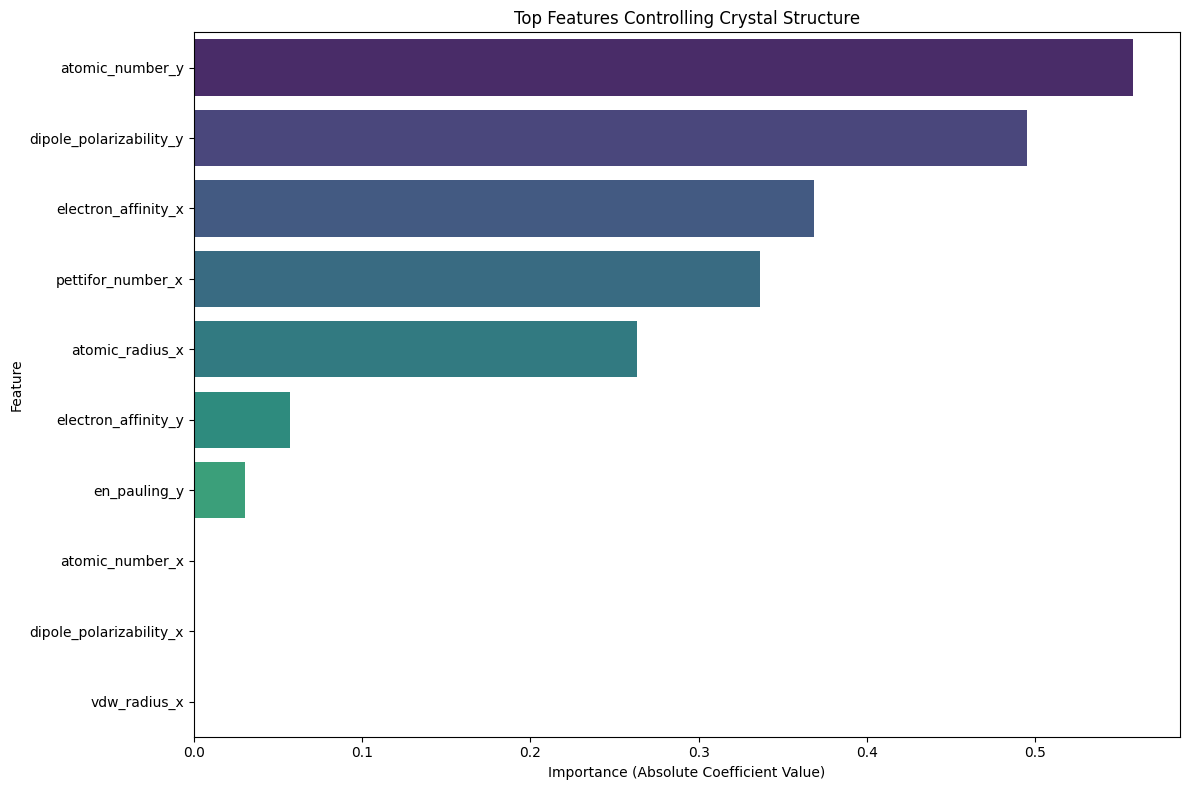

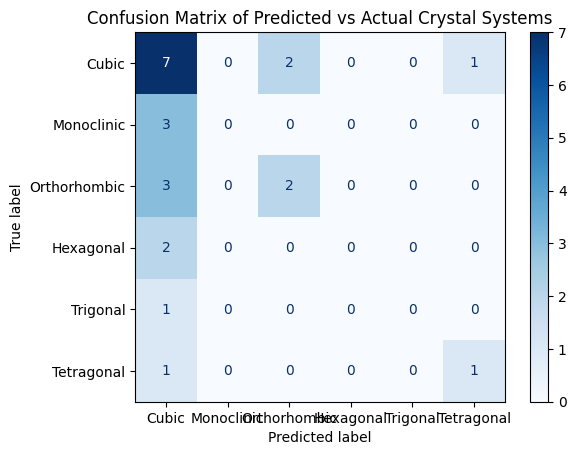


Model Insights:
1. Logistic regression effectively identifies the most impactful features based on their coefficient magnitudes.
2. The confusion matrix and classification report highlight model performance across crystal structure categories.
3. Top features can provide scientific insights into structural control mechanisms.


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the dataset
# Concatenate descriptors for both x and y elements to form the predictors
predictors = pd.concat([x_descriptors, y_descriptors], axis=1)

# Map `crystal_system` to numeric values for supervised learning
if 'crystal_system' not in df_AB.columns:
    raise ValueError("'crystal_system' column is missing in df_AB.")

crystal_system_mapping = {cat: idx for idx, cat in enumerate(df_AB['crystal_system'].unique())}
df_AB['crystal_system_numeric'] = df_AB['crystal_system'].map(crystal_system_mapping)

# Target variable (numeric encoding of crystal systems)
target = df_AB['crystal_system_numeric']

# Step 2: Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(predictors)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, target, test_size=0.2, random_state=42, stratify=target
)

# Step 4: Train Logistic Regression model
# L1 penalty for feature selection
log_reg_model = LogisticRegression(max_iter=500, solver='liblinear', penalty='l1', random_state=42)
log_reg_model.fit(X_train, y_train)

# Step 5: Extract feature importance
feature_importance = np.abs(log_reg_model.coef_[0])  # Absolute magnitude of coefficients
feature_names = predictors.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display top features
print("Top Features Controlling Crystal Structure:")
print(importance_df.head(10))

# Step 6: Evaluate the model
y_pred = log_reg_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 7: Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top Features Controlling Crystal Structure")
plt.xlabel("Importance (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Step 8: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(crystal_system_mapping.keys()))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix of Predicted vs Actual Crystal Systems")
plt.show()

# Step 9: Explained results
print("\nModel Insights:")
print("1. Logistic regression effectively identifies the most impactful features based on their coefficient magnitudes.")
print("2. The confusion matrix and classification report highlight model performance across crystal structure categories.")
print("3. Top features can provide scientific insights into structural control mechanisms.")


Top Features Controlling Crystal Structure:
                    Feature  Coefficient  Absolute Importance
8           atomic_number_y    -0.558053             0.558053
10  dipole_polarizability_y     0.494856             0.494856
3       electron_affinity_x    -0.368296             0.368296
7         pettifor_number_x    -0.336192             0.336192
1           atomic_radius_x    -0.263236             0.263236
11      electron_affinity_y    -0.057324             0.057324
14             en_pauling_y    -0.030247             0.030247
0           atomic_number_x     0.000000             0.000000
2   dipole_polarizability_x     0.000000             0.000000
4              vdw_radius_x     0.000000             0.000000

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.70      0.52        10
           1       0.00      0.00      0.00         3
           2       0.50      0.40      0.44         5
           3       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


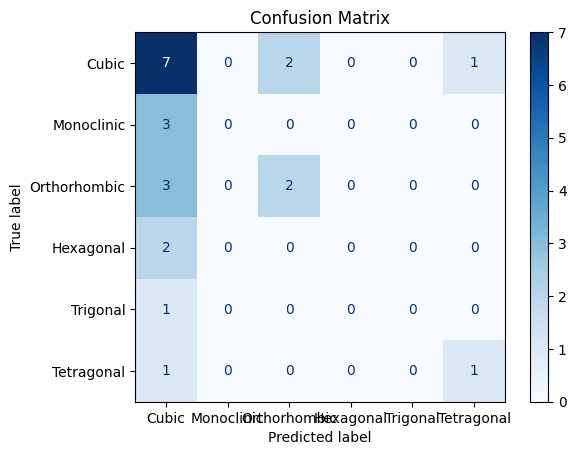

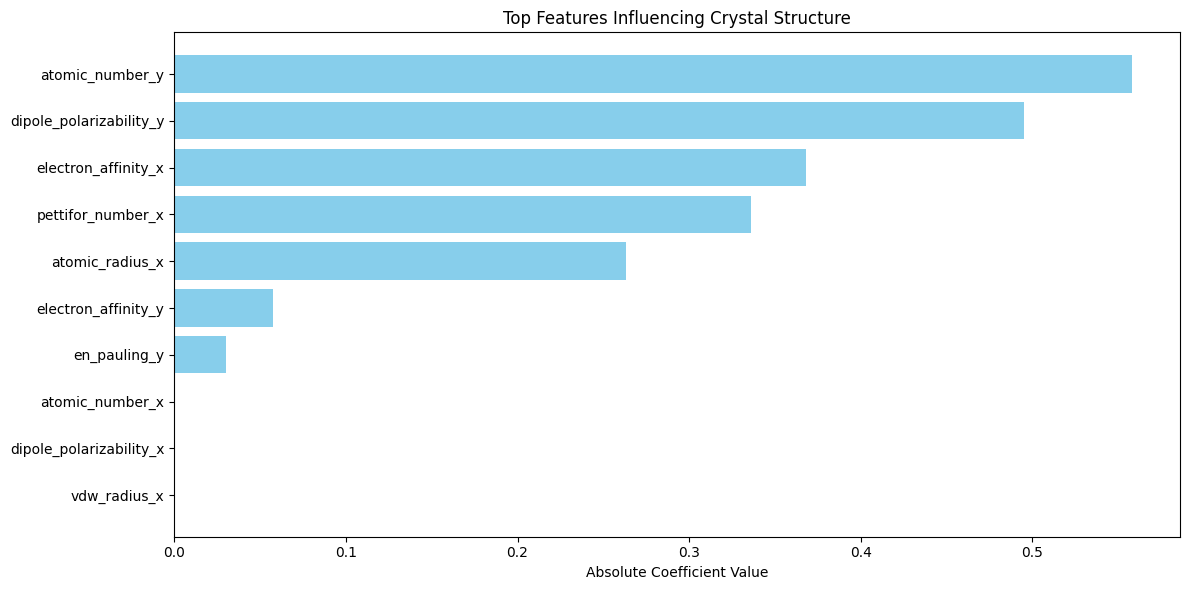

In [29]:
# Step 1: Data Preparation
# Combine descriptors for both elements into a single feature set
X = pd.concat([x_descriptors, y_descriptors], axis=1)

# Map crystal structure labels to numeric values
if 'crystal_system' not in df_AB.columns:
    raise ValueError("Column 'crystal_system' is missing in the dataset.")
crystal_system_mapping = {label: idx for idx, label in enumerate(df_AB['crystal_system'].unique())}
y = df_AB['crystal_system'].map(crystal_system_mapping)

# Step 2: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Train a Logistic Regression Model
logreg = LogisticRegression(max_iter=500, solver='liblinear', penalty='l1', random_state=42)
logreg.fit(X_train, y_train)

# Step 5: Extract Feature Importance
coefficients = logreg.coef_[0]
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Absolute Importance': np.abs(coefficients)
}).sort_values(by='Absolute Importance', ascending=False)

print("Top Features Controlling Crystal Structure:")
print(importance.head(10))

# Step 6: Model Evaluation
y_pred = logreg.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(crystal_system_mapping.keys()))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Step 7: Visualize Top Features
plt.figure(figsize=(12, 6))
plt.barh(importance['Feature'][:10], importance['Absolute Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Absolute Coefficient Value')
plt.title('Top Features Influencing Crystal Structure')
plt.tight_layout()
plt.show()


I.6. Choose the decision tree based method and identify the factors that control the crystal structure.

Top Features Influencing Crystal Structure:
                    Feature  Importance
7         pettifor_number_x    0.097783
3       electron_affinity_x    0.090205
8           atomic_number_y    0.078092
2   dipole_polarizability_x    0.076433
11      electron_affinity_y    0.072440
0           atomic_number_x    0.070042
6              en_pauling_x    0.067450
15        pettifor_number_y    0.066741
14             en_pauling_y    0.066221
10  dipole_polarizability_y    0.058900

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.50      0.67      0.57         3
           2       0.40      0.40      0.40         5
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2

    accuracy                           0.70        23
   macro avg       0.58      0.64      0.60        23
weig

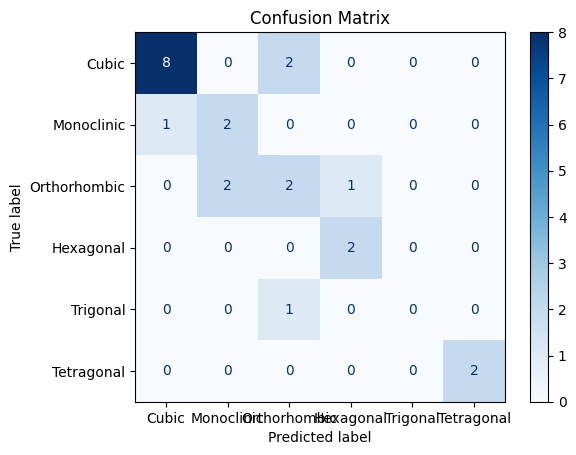

<ipython-input-30-9464f9030417>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


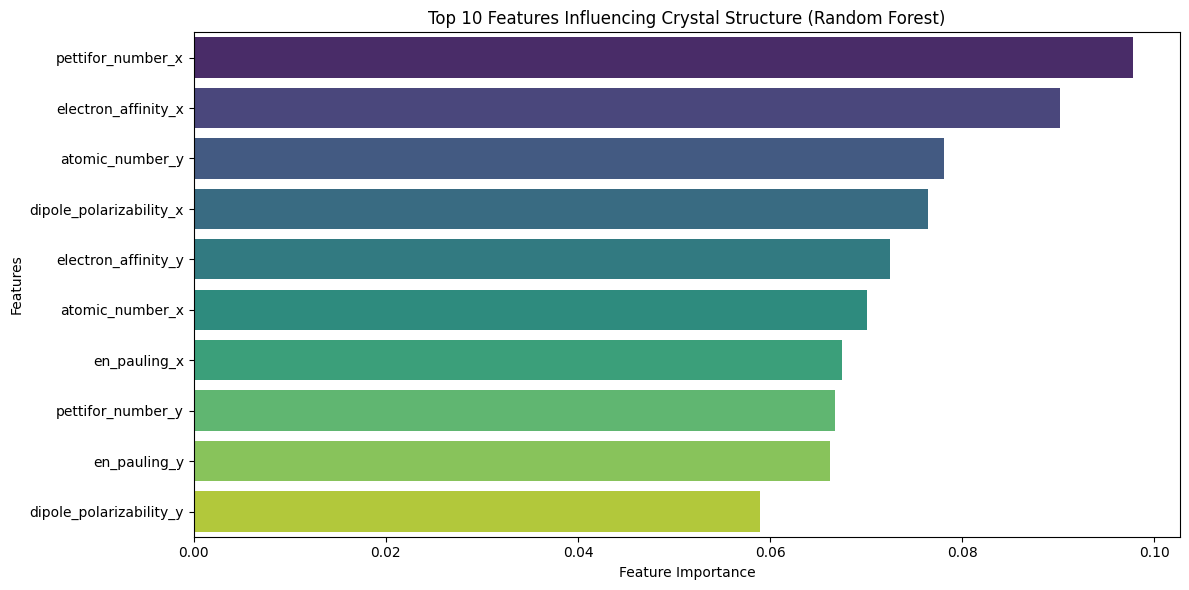

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preparation
# Combine descriptors of elements x and y into a unified feature matrix
X = pd.concat([x_descriptors, y_descriptors], axis=1)

# Map crystal system labels to numeric values for supervised learning
if 'crystal_system' not in df_AB.columns:
    raise ValueError("Column 'crystal_system' is missing in the dataset.")
crystal_system_mapping = {label: idx for idx, label in enumerate(df_AB['crystal_system'].unique())}
y = df_AB['crystal_system'].map(crystal_system_mapping)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Train the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    random_state=42,
    oob_score=True
)
rf_model.fit(X_train, y_train)

# Step 4: Extract Feature Importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Features Influencing Crystal Structure:")
print(importance_df.head(10))

# Step 5: Model Evaluation
y_pred = rf_model.predict(X_test)

# Classification Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Out-of-Bag (OOB) Score:", rf_model.oob_score_)

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=crystal_system_mapping.keys())
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Step 6: Visualize Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(
    x=importance_df['Importance'][:10],
    y=importance_df['Feature'][:10],
    palette="viridis"
)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Features Influencing Crystal Structure (Random Forest)')
plt.tight_layout()
plt.show()


I.7. Write the neural network based classifier that predicts the crystal structure based on the descriptors that you have chosen. Again, here you can choose one of multiple startegies. For example:

 - you can concatnate descriptors, or

-  build network that has two heads, then separate depe layer for each, then concatenation and then prediciton head.

<ipython-input-31-de1bfe4cbd6e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['crystal_system_numeric'] = df_AB['crystal_system'].map(crystal_system_mapping)



Training Neural Network...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.1703 - loss: 2.0730 - val_accuracy: 0.1111 - val_loss: 1.7558
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1931 - loss: 2.1443 - val_accuracy: 0.2222 - val_loss: 1.7710
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1703 - loss: 1.8025 - val_accuracy: 0.1111 - val_loss: 1.7849
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2412 - loss: 1.8394 - val_accuracy: 0.0556 - val_loss: 1.8066
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3778 - loss: 1.7895 - val_accuracy: 0.0556 - val_loss: 1.8208
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2984 - loss: 1.6863 - val_accuracy: 0.0556 - val_loss: 1.8412
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3765 - loss: 1.5527 - val_accuracy: 0.0556 - val_loss: 1.8661
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4142 - loss: 1.5162 - val_accurac

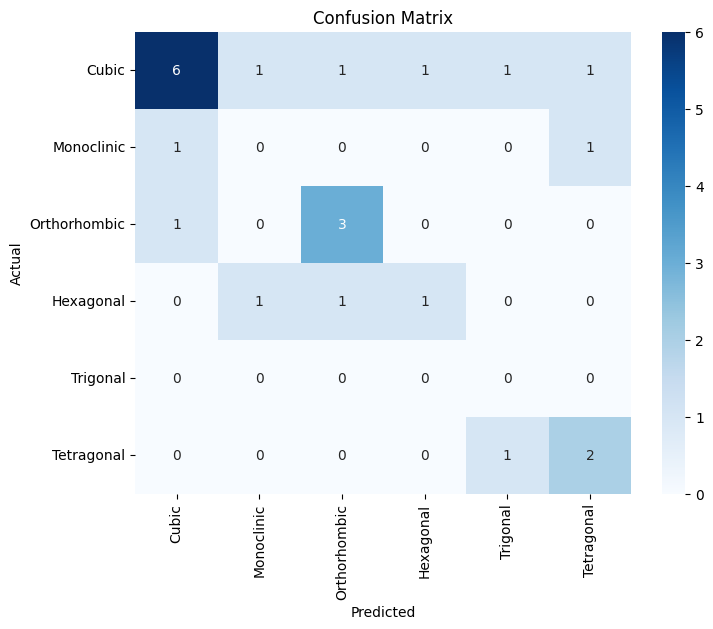

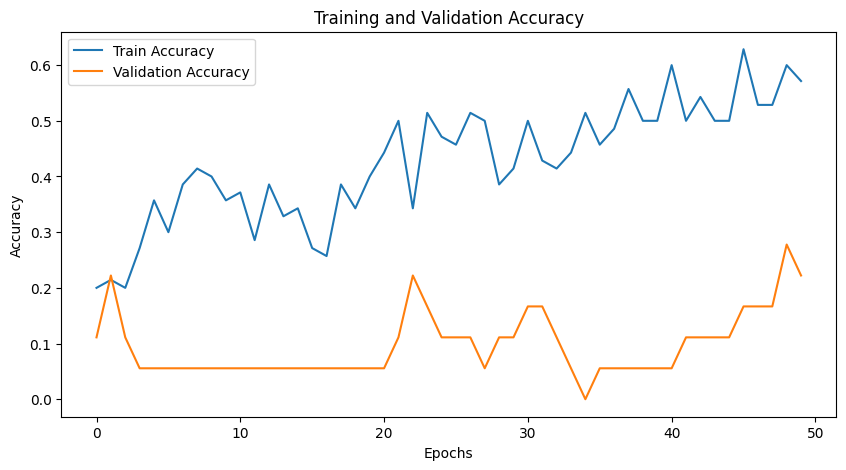

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preparation
# Separate x and y descriptors for branching
x_input = x_descriptors
y_input = y_descriptors

# Map crystal system to numeric values for the target variable
crystal_system_mapping = {cat: idx for idx, cat in enumerate(df_AB['crystal_system'].unique())}
df_AB['crystal_system_numeric'] = df_AB['crystal_system'].map(crystal_system_mapping)

# Define the target
target = df_AB['crystal_system_numeric']

# Scale the predictors
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X_scaled_x = scaler_x.fit_transform(x_input)
X_scaled_y = scaler_y.fit_transform(y_input)

# Convert target to one-hot encoding
num_classes = len(crystal_system_mapping)
y_categorical = tf.keras.utils.to_categorical(target, num_classes=num_classes)

# Split the data into training and testing sets
X_train_x, X_test_x, X_train_y, X_test_y, y_train, y_test = train_test_split(
    X_scaled_x, X_scaled_y, y_categorical, test_size=0.2, random_state=42
)

# Step 2: Compute Class Weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(target),
    y=target
)
class_weight_dict = dict(enumerate(class_weights))

# Step 3: Build the Two-Branch Neural Network
# Input branches
x_input_layer = Input(shape=(X_train_x.shape[1],), name="x_input")
y_input_layer = Input(shape=(X_train_y.shape[1],), name="y_input")

# Separate processing for each descriptor set
x_branch = Dense(128, activation='relu')(x_input_layer)
x_branch = Dropout(0.3)(x_branch)

y_branch = Dense(128, activation='relu')(y_input_layer)
y_branch = Dropout(0.3)(y_branch)

# Concatenate branches
merged = Concatenate()([x_branch, y_branch])

# Dense layers after concatenation
merged = Dense(128, activation='relu')(merged)
merged = Dropout(0.3)(merged)
output_layer = Dense(num_classes, activation='softmax', name="output")(merged)

# Compile the Model
model = Model(inputs=[x_input_layer, y_input_layer], outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
print("\nTraining Neural Network...")
history = model.fit(
    [X_train_x, X_train_y], y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weight_dict,
    verbose=1
)

# Step 5: Evaluate the Model
y_pred = np.argmax(model.predict([X_test_x, X_test_y]), axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 6: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=crystal_system_mapping.keys(),
            yticklabels=crystal_system_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 7: Visualize Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


I.8. Calculate the ROC curve

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


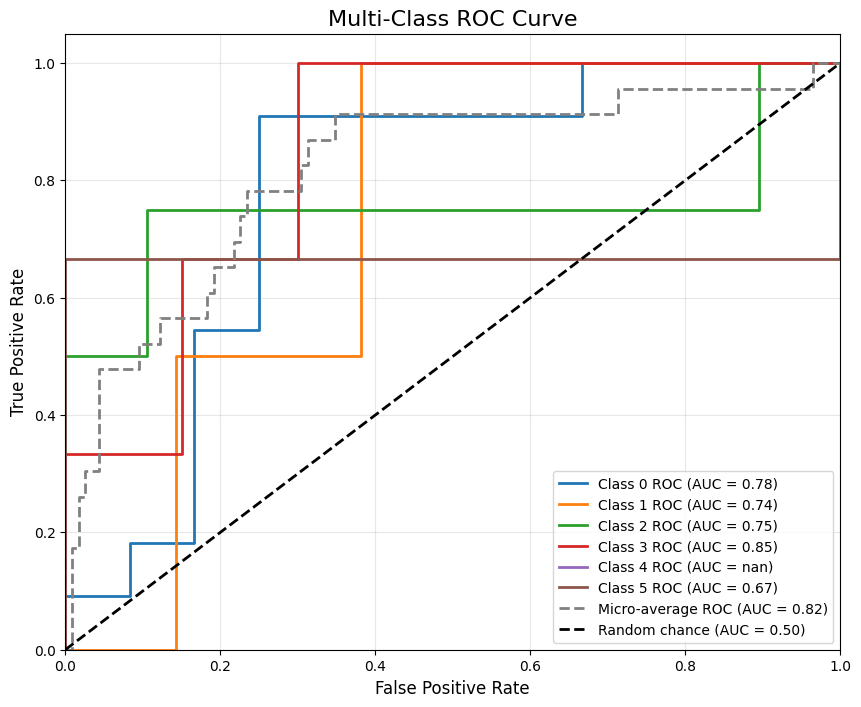

Detailed ROC AUC Scores:
 - Class 0: AUC = 0.7803
 - Class 1: AUC = 0.7381
 - Class 2: AUC = 0.7500
 - Class 3: AUC = 0.8500
 - Class 4: AUC = nan
 - Class 5: AUC = 0.6667
 - Micro-average: AUC = 0.8181


In [32]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Predict Class Probabilities
y_probs = model.predict([X_test_x, X_test_y])  # Probabilities for each class (multi-branch model)

# Step 2: Compute ROC Curve and AUC for Each Class
fpr = {}  # False Positive Rate
tpr = {}  # True Positive Rate
roc_auc = {}  # Area Under Curve (AUC)

# Calculate ROC and AUC per class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Step 3: Visualize the ROC Curve
plt.figure(figsize=(10, 8))

# Define a color cycle for distinct class plots
colors = cycle(plt.cm.tab10.colors[:num_classes])  # Use a colormap for consistent aesthetics

# Plot ROC curve for each class
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} ROC (AUC = {roc_auc[i]:.2f})')

# Add micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], linestyle='--', color='gray', lw=2,
         label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.2f})')

# Random chance diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random chance (AUC = 0.50)')

# Format the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-Class ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Step 4: Report AUC Scores
print("Detailed ROC AUC Scores:")
for i in range(num_classes):
    print(f" - Class {i}: AUC = {roc_auc[i]:.4f}")
print(f" - Micro-average: AUC = {roc_auc['micro']:.4f}")


I.9. Calculate the confusion matrix

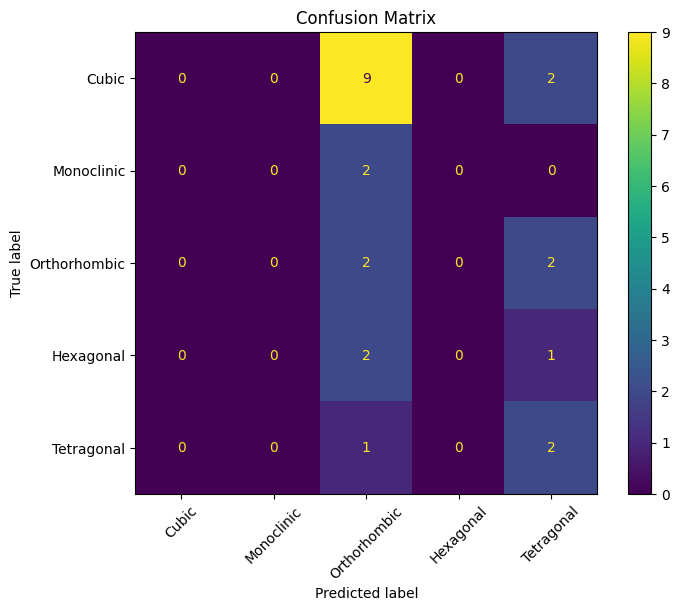

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Ensure class labels match the data
unique_classes = np.unique(y_test_labels)  # Unique class indices in the dataset
display_labels = [list(crystal_system_mapping.keys())[i] for i in unique_classes]  # Map indices to labels

# Step 2: Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Step 3: Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
plt.figure(figsize=(8, 6))
disp.plot(cmap="viridis", ax=plt.gca())
plt.title("Confusion Matrix")
plt.xticks(rotation=45)
plt.show()


I.10. What are the limitations of this analysis? How would you improve this predictions?

Answer: